In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
df = pd.read_csv(r'C:\Users\VictorAdeife\Documents\Dataset\Data Science\New folder\sample_5.csv')
df.head(2)

,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,acceptance_city_cat,delivery_city,delivery_office,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA
0,Register,133039910,NaN,NaN,0.0,OnTime,Document,2018-10-17T10:39:35Z,1,1,...,Main City,RIYADH,Sidr Agency - Al Aqeeq,Main City,Same City,Uni_System,0,0,0.16,3
1,Register,151616912,NaN,NaN,0.0,OnTime,International Inbound,2019-11-21T07:59:30Z,0,1,...,Main City,BRIDAH-GASSIM,Main Office - Buraidah,Sub City,Out Of Region,Int. Inbound,0,2,0.73,6


In [3]:
df['business_type'].value_counts()

EMS         11729
Register     4627
Parcel       3644
Name: business_type, dtype: int64

<AxesSubplot:>

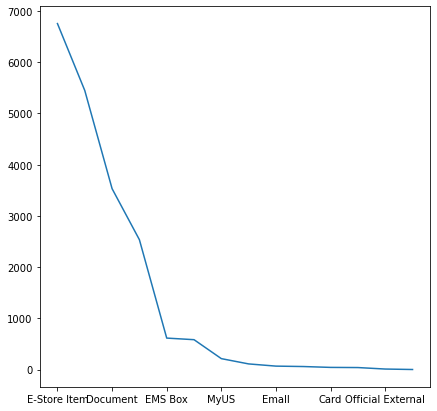

In [4]:
plt.figure(figsize=(7, 7))
df['type_english_name'].value_counts().plot()

In [5]:
df.columns

Index(['business_type', 'item_id', 'itemcode', 'e_commerce_request_date',
       'picke_up_interval', 'on_time', 'type_english_name', 'creation_date',
       'source_country_id', 'destination_country_id', 'acceptance_office',
       'acceptance_city', 'acceptance_cat_name', 'acceptance_city_cat',
       'delivery_city', 'delivery_office', 'delivery_city_cat', 'region',
       'acceptance_channel_type', 'customer_pending',
       'processing_center_count', 'transportation_time_total', 'SLA'],
      dtype='object')

<AxesSubplot:>

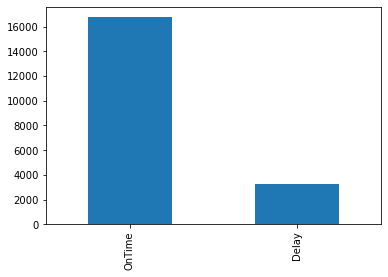

In [6]:
df.on_time.value_counts().plot(kind='bar')

In [7]:
df.delivery_city.value_counts().head(20)

RIYADH           5315
JEDDAH           2655
DAMMAM           1166
MAKKAH            875
MADINAH           826
HAFOF             719
AL-GATIF          566
AL-KOBAR          470
TAIF              418
ABHA              407
BRIDAH-GASSIM     385
TABUK             283
YANBU             266
NEJRAN            259
JUBAIL            253
HAIL              228
JAZAN             211
AL-KARG           180
OWNIZAH           159
AL-GNFDAH         141
Name: delivery_city, dtype: int64

In [8]:
df.acceptance_city.value_counts()

RIYADH         7672
JEDDAH         4484
DAMMAM         2610
MAKKAH          602
MADINAH         525
               ... 
MWGAG             1
AL QWARA          1
MARAT             1
AL GHAZALAH       1
ALHajera          1
Name: acceptance_city, Length: 145, dtype: int64

In [9]:
df['Month'] = pd.DatetimeIndex(df.creation_date).month
df.head(2)

,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,delivery_city,delivery_office,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA,Month
0,Register,133039910,NaN,NaN,0.0,OnTime,Document,2018-10-17T10:39:35Z,1,1,...,RIYADH,Sidr Agency - Al Aqeeq,Main City,Same City,Uni_System,0,0,0.16,3,10
1,Register,151616912,NaN,NaN,0.0,OnTime,International Inbound,2019-11-21T07:59:30Z,0,1,...,BRIDAH-GASSIM,Main Office - Buraidah,Sub City,Out Of Region,Int. Inbound,0,2,0.73,6,11


In [10]:
df['Week'] = pd.DatetimeIndex(df.creation_date).week
df.head(2)

<ipython-input-10-08a20c89f972>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week'] = pd.DatetimeIndex(df.creation_date).week


,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,delivery_office,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week
0,Register,133039910,NaN,NaN,0.0,OnTime,Document,2018-10-17T10:39:35Z,1,1,...,Sidr Agency - Al Aqeeq,Main City,Same City,Uni_System,0,0,0.16,3,10,42
1,Register,151616912,NaN,NaN,0.0,OnTime,International Inbound,2019-11-21T07:59:30Z,0,1,...,Main Office - Buraidah,Sub City,Out Of Region,Int. Inbound,0,2,0.73,6,11,47


from datetime import datetime

df['Week_Days'] = pd.DatetimeIndex.dayofweek(df['creation_date'])
df.head(1)

<AxesSubplot:>

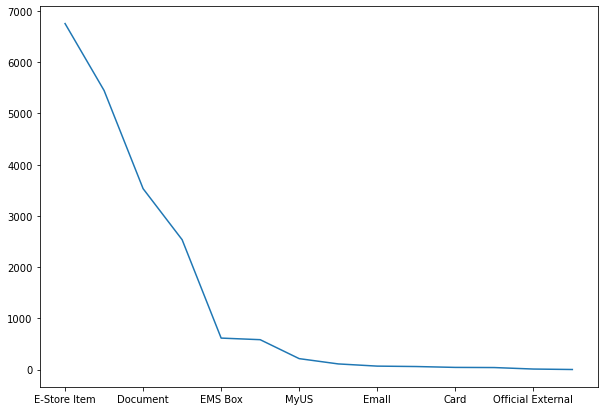

In [12]:
plt.figure(figsize= (10, 7))
df.type_english_name.value_counts().plot()

In [13]:
df.SLA[df.SLA == 2]

2        2
8        2
13       2
16       2
23       2
        ..
19981    2
19983    2
19984    2
19988    2
19990    2
Name: SLA, Length: 5938, dtype: int64

<AxesSubplot:xlabel='type_english_name'>

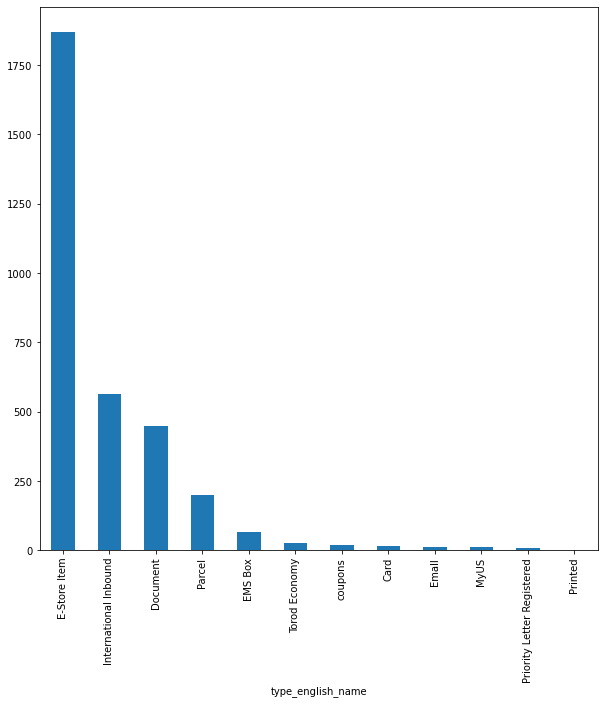

In [14]:
plt.figure(figsize=(10, 10))
on_time = df[['on_time', 'type_english_name']]
on_time.value_counts()['Delay'].plot(kind='bar')

In [15]:
# How many E-store items are delayed
on_time.value_counts()['Delay'][0]/on_time.value_counts()[0].sum()

0.3824733824733825

In [16]:
# How many E-store items are delayed
on_time.value_counts()['Delay'][0]/on_time.value_counts()['Delay'].sum()

0.577612863327149

<AxesSubplot:xlabel='picke_up_interval', ylabel='on_time'>

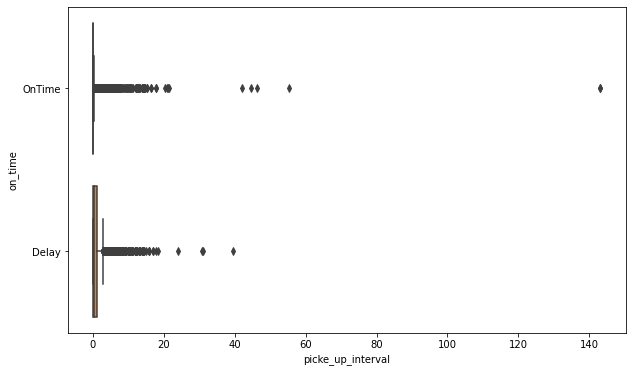

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'picke_up_interval', y= 'on_time', data= df, orient='h')

<AxesSubplot:xlabel='transportation_time_total'>

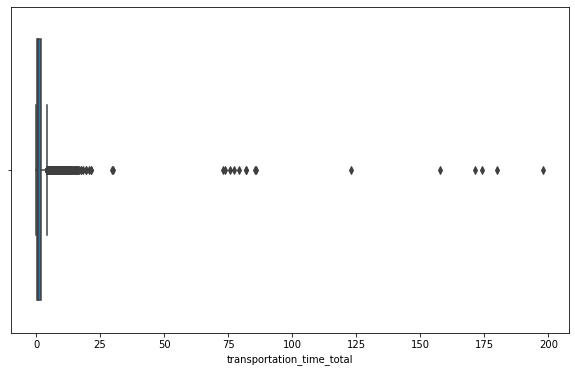

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'transportation_time_total',  data= df, orient='h')

HANDLING OUTLIERS

In [19]:
# Handling outliers in the transportation_total_time column
print(df.transportation_time_total.quantile(0.50))
print(df.transportation_time_total.quantile(0.90))
df['transportation_time_total'] = np.where(df['transportation_time_total'] > df.transportation_time_total.quantile(0.50),
                                           df.transportation_time_total.quantile(0.90), df['transportation_time_total'])
df.head(2)

0.92
3.58


,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,delivery_office,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week
0,Register,133039910,NaN,NaN,0.0,OnTime,Document,2018-10-17T10:39:35Z,1,1,...,Sidr Agency - Al Aqeeq,Main City,Same City,Uni_System,0,0,0.16,3,10,42
1,Register,151616912,NaN,NaN,0.0,OnTime,International Inbound,2019-11-21T07:59:30Z,0,1,...,Main Office - Buraidah,Sub City,Out Of Region,Int. Inbound,0,2,0.73,6,11,47


<AxesSubplot:xlabel='transportation_time_total'>

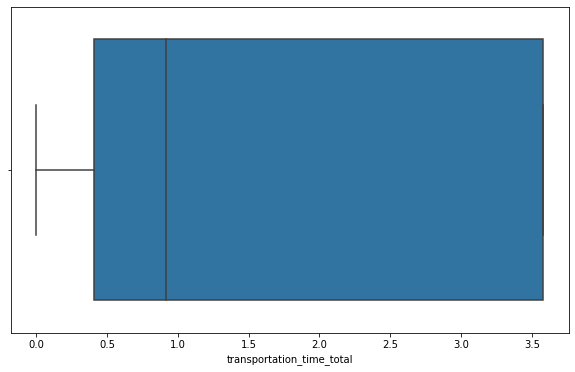

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'transportation_time_total',  data= df, orient='h')

<AxesSubplot:xlabel='processing_center_count', ylabel='transportation_time_total'>

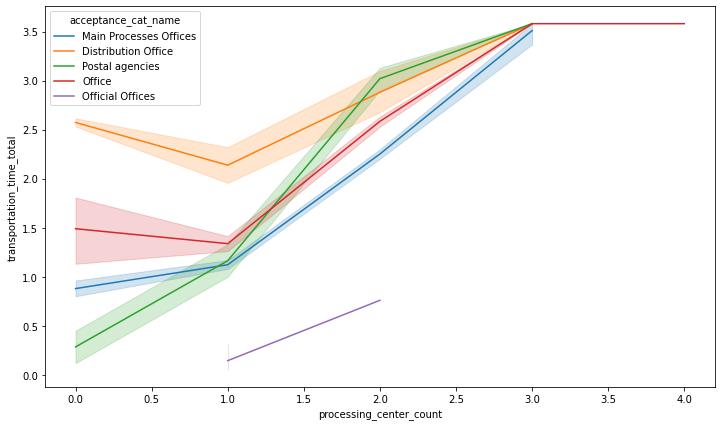

In [21]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= 'processing_center_count', y= 'transportation_time_total', hue= 'acceptance_cat_name', data=df)

In [22]:
df.transportation_time_total.value_counts()

3.58    9389
0.00     426
0.03     242
0.04     237
0.07     227
        ... 
0.33      42
0.31      40
0.35      39
0.27      39
0.32      37
Name: transportation_time_total, Length: 94, dtype: int64

<AxesSubplot:xlabel='processing_center_count', ylabel='transportation_time_total'>

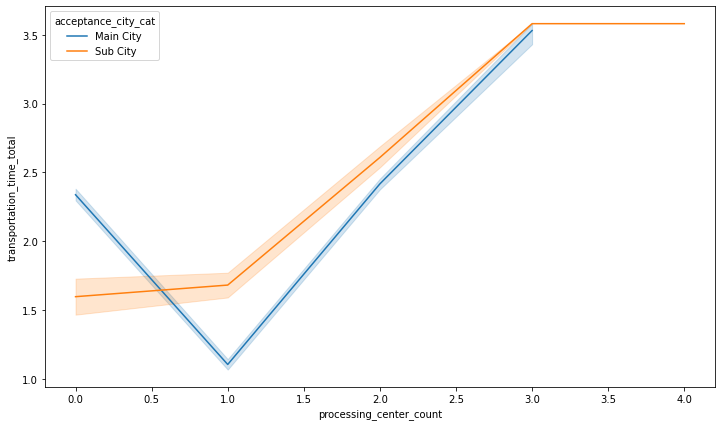

In [23]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= 'processing_center_count', y= 'transportation_time_total', hue= 'acceptance_city_cat', data=df)

In [24]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes('object').columns.tolist()

In [25]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy = 'mean')
imputer_cat = SimpleImputer(strategy = 'most_frequent')

In [26]:
df[numerical_cols].isna().sum()

item_id                         0
picke_up_interval               0
source_country_id               0
destination_country_id          0
customer_pending                0
processing_center_count         0
transportation_time_total    1156
SLA                             0
Month                           0
Week                            0
dtype: int64

In [27]:
df[categorical_cols].isna().sum()

business_type                  0
itemcode                   13055
e_commerce_request_date    13055
on_time                        0
type_english_name              0
creation_date                  0
acceptance_office              0
acceptance_city                0
acceptance_cat_name            0
acceptance_city_cat            0
delivery_city                  0
delivery_office               25
delivery_city_cat              0
region                         0
acceptance_channel_type        0
dtype: int64

In [28]:
imputer_num.fit(df[numerical_cols])
imputer_cat.fit(df[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [29]:
df_new = df

In [30]:
df_new[numerical_cols] = imputer_num.transform(df[numerical_cols])
df_new[categorical_cols] = imputer_cat.transform(df[categorical_cols])

In [31]:
df_new = df_new[numerical_cols + categorical_cols]

In [32]:
df_new.head(2)

,item_id,picke_up_interval,source_country_id,destination_country_id,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week,...,creation_date,acceptance_office,acceptance_city,acceptance_cat_name,acceptance_city_cat,delivery_city,delivery_office,delivery_city_cat,region,acceptance_channel_type
0,133039910.0,0.0,1.0,1.0,0.0,0.0,0.16,3.0,10.0,42.0,...,2018-10-17T10:39:35Z,Central Post in Riyadh,RIYADH,Main Processes Offices,Main City,RIYADH,Sidr Agency - Al Aqeeq,Main City,Same City,Uni_System
1,151616912.0,0.0,0.0,1.0,0.0,2.0,0.73,6.0,11.0,47.0,...,2019-11-21T07:59:30Z,Jeddah Central Post,JEDDAH,Main Processes Offices,Main City,BRIDAH-GASSIM,Main Office - Buraidah,Sub City,Out Of Region,Int. Inbound


In [33]:
# Convert the Categorical Columns to Numerical Columns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [34]:
encoder = OrdinalEncoder()
df_new[categorical_cols] = encoder.fit_transform(df_new[categorical_cols])

In [35]:
df_new = df_new[numerical_cols + categorical_cols]
df_new.head(2)

,item_id,picke_up_interval,source_country_id,destination_country_id,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week,...,creation_date,acceptance_office,acceptance_city,acceptance_cat_name,acceptance_city_cat,delivery_city,delivery_office,delivery_city_cat,region,acceptance_channel_type
0,133039910.0,0.0,1.0,1.0,0.0,0.0,0.16,3.0,10.0,42.0,...,3756.0,221.0,118.0,1.0,0.0,132.0,514.0,0.0,1.0,4.0
1,151616912.0,0.0,0.0,1.0,0.0,2.0,0.73,6.0,11.0,47.0,...,12212.0,274.0,89.0,1.0,0.0,70.0,387.0,1.0,0.0,2.0


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df_new.drop(['on_time', 'item_id', 'creation_date'], axis = 1)
y = df_new.on_time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [39]:
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
etc = ExtraTreesClassifier()
rfc = RandomForestClassifier()
lr = LogisticRegression()

In [40]:
len(y_train)

16000

In [41]:
gbc.fit(X_train, y_train)
abc.fit(X_train, y_train)
etc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

C:\Users\VictorAdeife\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
gbc_a = gbc.predict(X_train)
abc_a = abc.predict(X_train)
etc_a = etc.predict(X_train)
rfc_a = rfc.predict(X_train)
lr_a  = lr.predict( X_train)

In [43]:
# Check the mean absolute error on the train set
from sklearn.metrics import accuracy_score
print('The mean absolute error for GBC is:', accuracy_score(y_train, gbc_a))
print('The mean absolute error for ABC is:', accuracy_score(y_train, abc_a))
print('The mean absolute error for ETC is:', accuracy_score(y_train, etc_a))
print('The mean absolute error for RFC is:', accuracy_score(y_train, rfc_a))
print('The mean absolute error for LR is:',  accuracy_score(y_train, lr_a))

The mean absolute error for GBC is: 0.886875
The mean absolute error for ABC is: 0.872125
The mean absolute error for ETC is: 0.9983125
The mean absolute error for RFC is: 0.99825
The mean absolute error for LR is: 0.84


In [44]:
gbc_pred = gbc.predict(X_test)
abc_pred = abc.predict(X_test)
etc_pred = etc.predict(X_test)
rfc_pred = rfc.predict(X_test)
lr_pred  = lr.predict( X_test)

In [45]:

# Check the mean absolute error on the TEST set
from sklearn.metrics import mean_absolute_error
print('The mean absolute error for GBC is:', accuracy_score(y_test, gbc_pred))
print('The mean absolute error for ABC is:', accuracy_score(y_test, abc_pred))
print('The mean absolute error for ETC is:', accuracy_score(y_test, etc_pred))
print('The mean absolute error for RFC is:', accuracy_score(y_test, rfc_pred))
print('The mean absolute error for LR is:', accuracy_score(y_test, lr_pred))

The mean absolute error for GBC is: 0.8845
The mean absolute error for ABC is: 0.87825
The mean absolute error for ETC is: 0.881
The mean absolute error for RFC is: 0.8865
The mean absolute error for LR is: 0.844


In [46]:
rfc.feature_importances_.sort()

In [47]:
# Random Forest has the best prediction on the Test set
plt.figure(figsize=(12, 10))
feature_importance = pd.DataFrame({'importance': rfc.feature_importances_, 'column_names': X.columns})
feature_importance.sort_values(by='importance', ascending = False, inplace= True)

<Figure size 864x720 with 0 Axes>

<AxesSubplot:xlabel='importance', ylabel='column_names'>

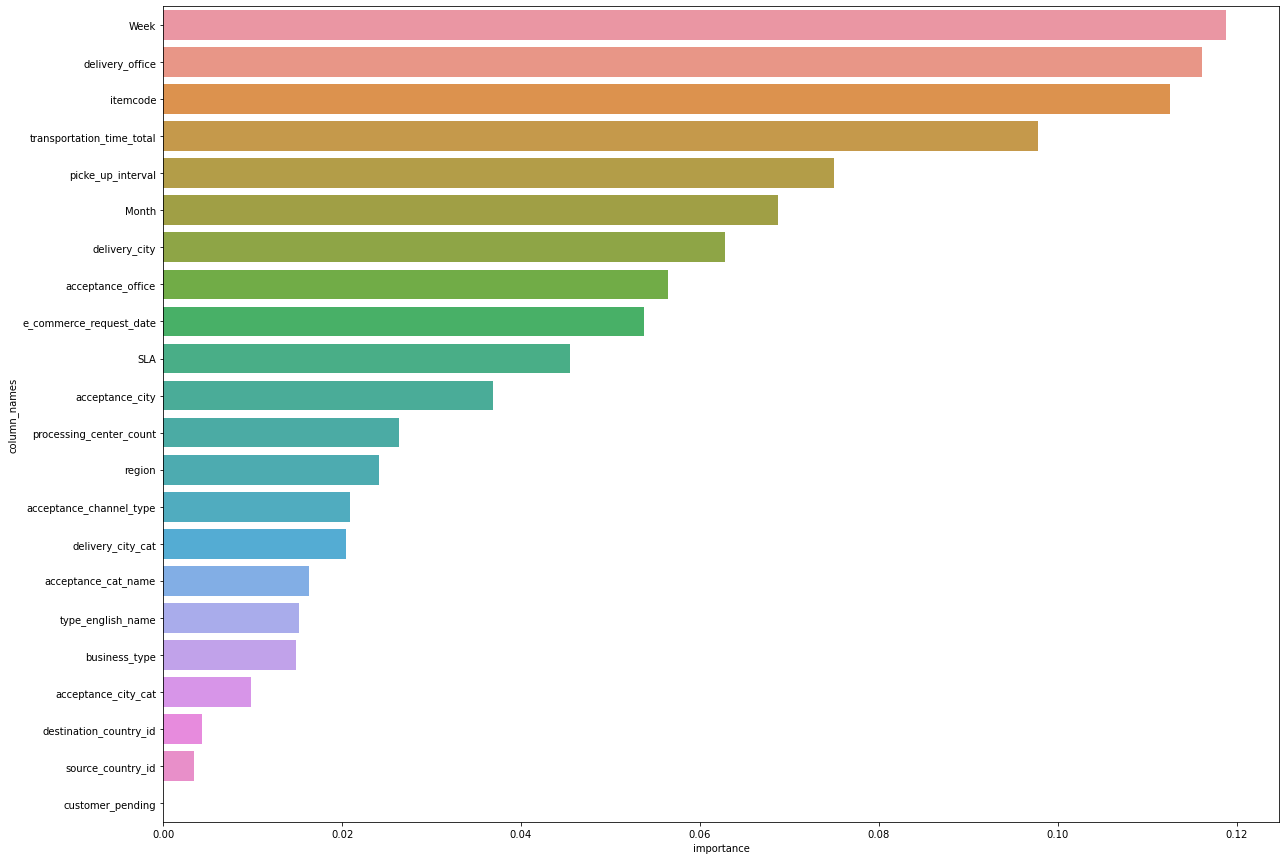

In [48]:
plt.figure(figsize=(20, 15))
sns.barplot(x= 'importance', y= 'column_names', data = feature_importance, orient="h" )

In [49]:
rfc_pred = rfc.predict_proba(X)
df['Probability of delay'] = rfc_pred[:, 0]

In [50]:
df.head(3)

,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week,Probability of delay
0,Register,133039910.0,JARUPD2044069919,34:41.4,0.00,OnTime,Document,2018-10-17T10:39:35Z,1.0,1.0,...,Main City,Same City,Uni_System,0.0,0.0,0.16,3.0,10.0,42.0,0.04
1,Register,151616912.0,JARUPD2044069919,34:41.4,0.00,OnTime,International Inbound,2019-11-21T07:59:30Z,0.0,1.0,...,Sub City,Out Of Region,Int. Inbound,0.0,2.0,0.73,6.0,11.0,47.0,0.00
2,EMS,164322878.0,CRDSAL0076926020,44:30.6,0.71,Delay,E-Store Item,2020-10-07T09:50:08Z,1.0,1.0,...,Main City,Same City,E-Commerce Picked Up by courier,0.0,0.0,3.58,2.0,10.0,41.0,0.70


<AxesSubplot:xlabel='transportation_time_total', ylabel='Probability of delay'>

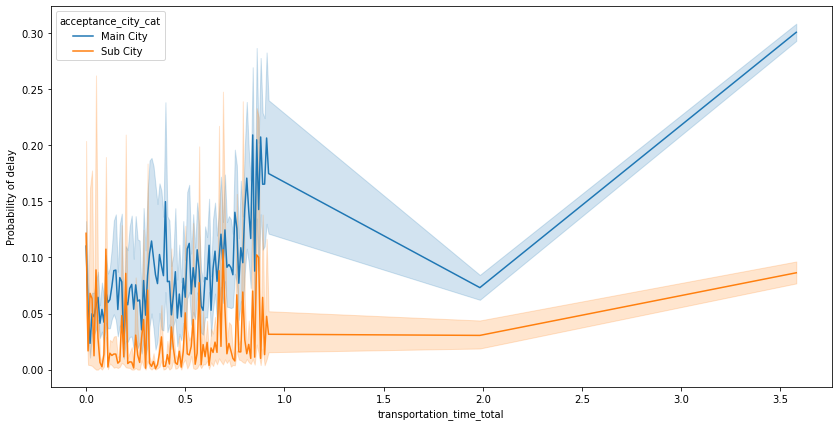

In [51]:
# Acceptance Category Delay
plt.figure(figsize=(14, 7))
sns.lineplot(x= 'transportation_time_total', y= 'Probability of delay', hue= 'acceptance_city_cat', data=df)

<AxesSubplot:xlabel='transportation_time_total', ylabel='Probability of delay'>

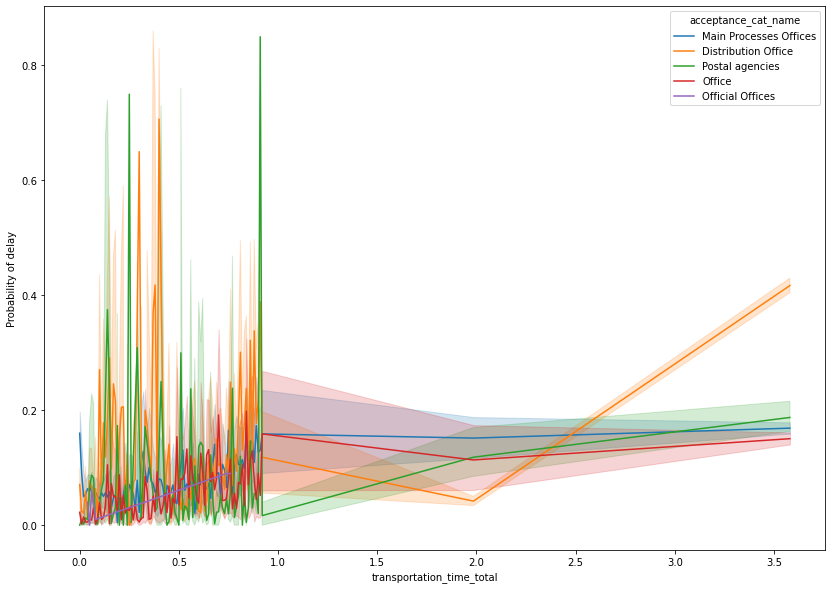

In [52]:
# Acceptance Category Delay
plt.figure(figsize=(14, 10))
sns.lineplot(x= 'transportation_time_total', y= 'Probability of delay', hue= 'acceptance_cat_name', data=df)

<AxesSubplot:xlabel='SLA', ylabel='Probability of delay'>

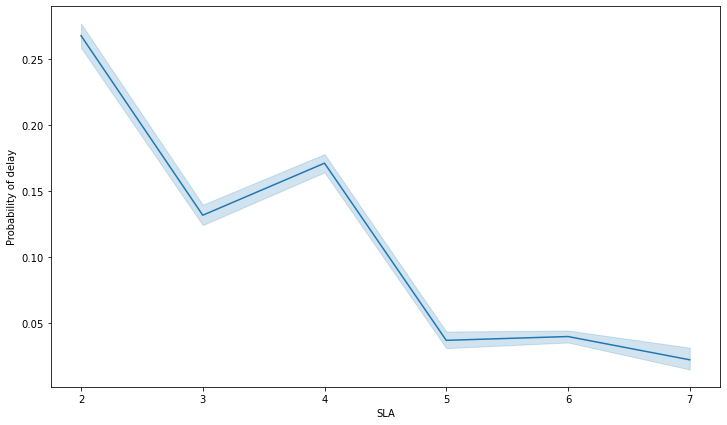

In [53]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.SLA, y= 'Probability of delay', data=df)

<AxesSubplot:xlabel='SLA', ylabel='Probability of delay'>

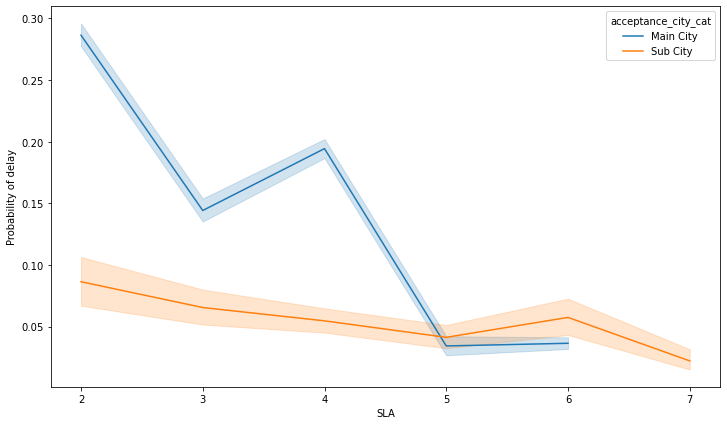

In [54]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.SLA, y= 'Probability of delay', hue= 'acceptance_city_cat', data=df)

<AxesSubplot:xlabel='SLA', ylabel='Probability of delay'>

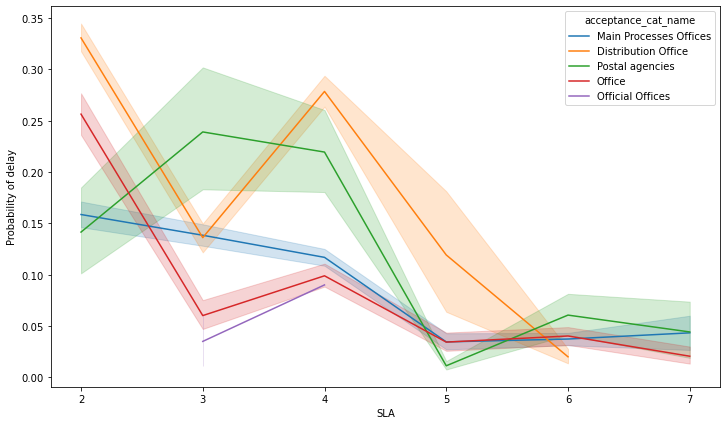

In [56]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.SLA, y= 'Probability of delay', hue= 'acceptance_cat_name', data=df)

<AxesSubplot:xlabel='processing_center_count', ylabel='Probability of delay'>

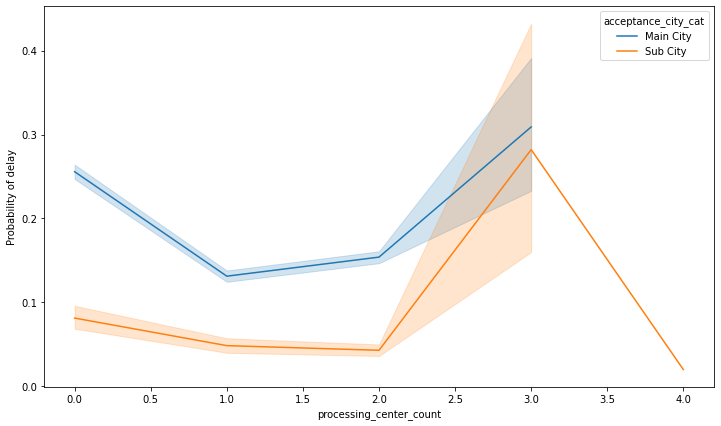

In [57]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= 'processing_center_count', y= 'Probability of delay', hue= 'acceptance_city_cat', data=df)

<AxesSubplot:xlabel='processing_center_count', ylabel='Probability of delay'>

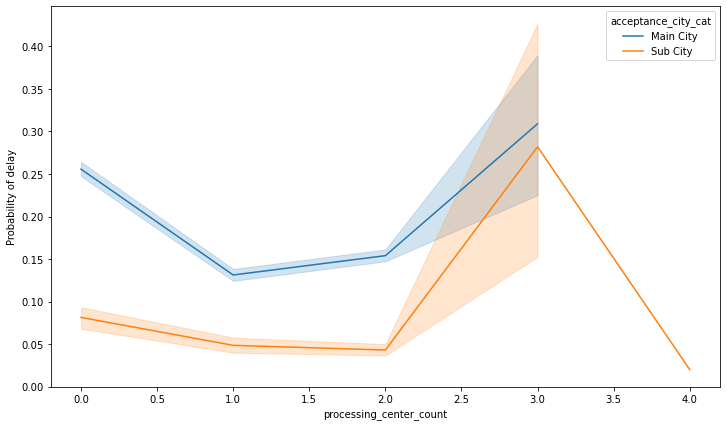

In [58]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= 'processing_center_count', y= 'Probability of delay', hue= 'acceptance_city_cat', data=df)

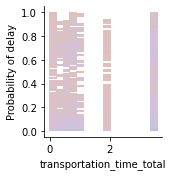

In [59]:
x_vars = ['transportation_time_total']
y_vars = ['Probability of delay']

g = sns.PairGrid(data = df, hue='SLA', x_vars=x_vars, y_vars=y_vars)
g.map(sns.histplot)

In [60]:
df.head()

,business_type,item_id,itemcode,e_commerce_request_date,picke_up_interval,on_time,type_english_name,creation_date,source_country_id,destination_country_id,...,delivery_city_cat,region,acceptance_channel_type,customer_pending,processing_center_count,transportation_time_total,SLA,Month,Week,Probability of delay
0,Register,133039910.0,JARUPD2044069919,34:41.4,0.00,OnTime,Document,2018-10-17T10:39:35Z,1.0,1.0,...,Main City,Same City,Uni_System,0.0,0.0,0.16,3.0,10.0,42.0,0.04
1,Register,151616912.0,JARUPD2044069919,34:41.4,0.00,OnTime,International Inbound,2019-11-21T07:59:30Z,0.0,1.0,...,Sub City,Out Of Region,Int. Inbound,0.0,2.0,0.73,6.0,11.0,47.0,0.00
2,EMS,164322878.0,CRDSAL0076926020,44:30.6,0.71,Delay,E-Store Item,2020-10-07T09:50:08Z,1.0,1.0,...,Main City,Same City,E-Commerce Picked Up by courier,0.0,0.0,3.58,2.0,10.0,41.0,0.70
3,Register,146010976.0,JARUPD2044069919,34:41.4,0.00,OnTime,International Inbound,2019-07-21T08:38:47Z,0.0,1.0,...,Main City,Same City,Int. Inbound,0.0,1.0,0.04,3.0,7.0,29.0,0.02
4,Register,141199839.0,JARUPD2044069919,34:41.4,0.00,OnTime,International Inbound,2019-04-04T09:22:08Z,0.0,1.0,...,Main City,Same City,Int. Inbound,0.0,1.0,3.58,3.0,4.0,14.0,0.10


In [61]:
df.columns

Index(['business_type', 'item_id', 'itemcode', 'e_commerce_request_date',
       'picke_up_interval', 'on_time', 'type_english_name', 'creation_date',
       'source_country_id', 'destination_country_id', 'acceptance_office',
       'acceptance_city', 'acceptance_cat_name', 'acceptance_city_cat',
       'delivery_city', 'delivery_office', 'delivery_city_cat', 'region',
       'acceptance_channel_type', 'customer_pending',
       'processing_center_count', 'transportation_time_total', 'SLA', 'Month',
       'Week', 'Probability of delay'],
      dtype='object')

In [96]:
df['transit_same_city'] = 0

for i in range(len(df)):  
    if df['delivery_city_cat'][i] == df['acceptance_city_cat'][i]:
        df['transit_same_city'][i] = 'Main City to Main City'
    else:
        df['transit_same_city'][i] = 'Different City Category '

<ipython-input-96-b1babd08a4ff>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transit_same_city'][i] = 'Main City to Main City'
<ipython-input-96-b1babd08a4ff>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transit_same_city'][i] = 'Different City Category '


In [97]:
df['transit_same_city'].head()

0      Main City to Main City
1    Different City Category 
2      Main City to Main City
3      Main City to Main City
4      Main City to Main City
Name: transit_same_city, dtype: object

<AxesSubplot:xlabel='processing_center_count', ylabel='Probability of delay'>

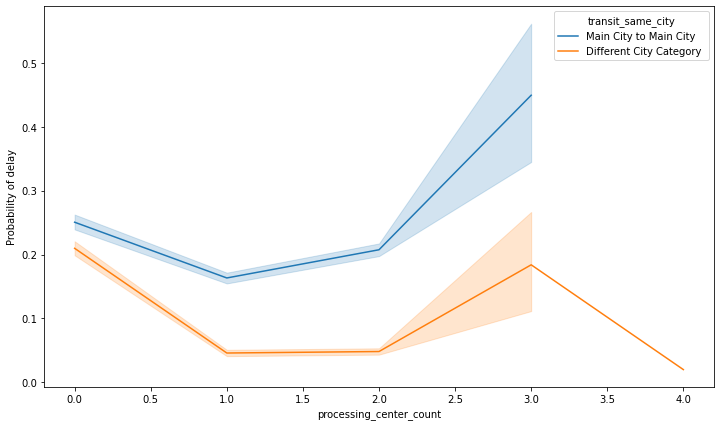

In [98]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= 'processing_center_count', y= 'Probability of delay', hue= 'transit_same_city', data=df)

<AxesSubplot:ylabel='transit_same_city'>

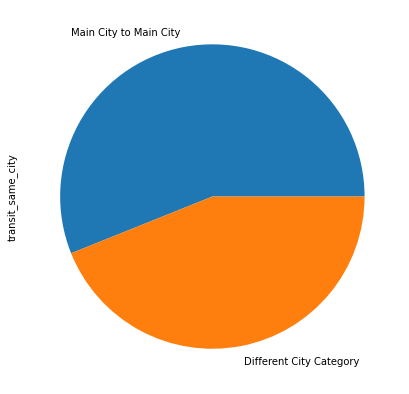

In [105]:
plt.figure(figsize=(12, 7))
df.transit_same_city.value_counts().plot(kind='pie', )

<AxesSubplot:xlabel='SLA', ylabel='Probability of delay'>

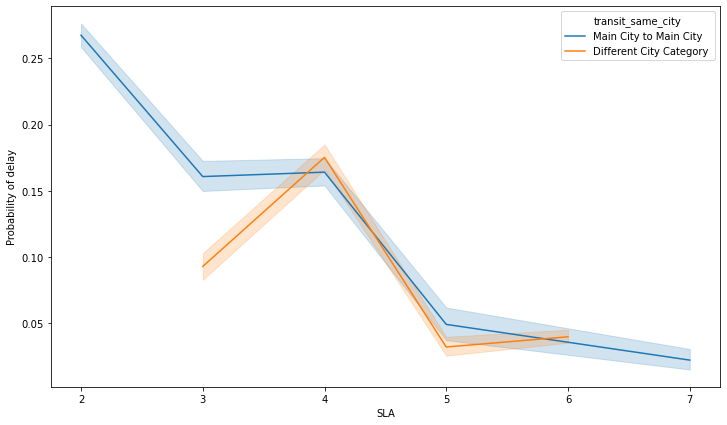

In [106]:
# Acceptance Category Delay
plt.figure(figsize=(12, 7))
sns.lineplot(x= df.SLA, y= 'Probability of delay', hue= 'transit_same_city', data=df)